In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = np.reshape(x_train, (-1,28,28,1))   #-1의 의미 : 뒤에를 28*28*1로 고정 나머지 계산 처리
x_test = np.reshape(x_test, (-1,28,28,1))
x_train.shape, x_test.shape   #흑백사진이므로 Channel 수가 1임

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [4]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train.shape, y_test.shape  #to_ategoircal : ㅒOne hot Encoding 해주는 기능

((60000, 10), (10000, 10))

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


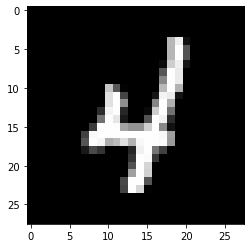

In [11]:
i = np.random.randint(1000)
print(y_train[i])
plt.imshow(x_train[i], cmap='gray')

In [18]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split = 0.25
)

datagen.fit(x_train)

In [60]:
dropout_rate = 0.2

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(4,4), filters=40, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Conv2D(kernel_size=(2,2), filters=40, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Conv2D(kernel_size=(2,2), filters=40, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy',
              metrics = ['accuracy']
             )

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 25, 25, 40)        680       
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 12, 12, 40)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 12, 12, 40)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 11, 11, 40)        6440      
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 5, 5, 40)          0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 5, 5, 40)          0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 4, 4, 40)        

In [61]:
train_generator = datagen.flow(x_train, y_train, batch_size = 64, subset = 'training')
val_generator = datagen.flow(x_train, y_train, batch_size = 64, subset = 'validation')

history = model.fit_generator( train_generator,
                               epochs = 20,
                               verbose = 1,
                               validation_data = val_generator,
                               )

Epoch 1/20
704/704 [==============================] - 34s 47ms/step - loss: 3.7552 - accuracy: 0.3360 - val_loss: 0.4092 - val_accuracy: 0.8775
Epoch 2/20
704/704 [==============================] - 31s 44ms/step - loss: 0.5606 - accuracy: 0.8169 - val_loss: 0.2711 - val_accuracy: 0.9182
Epoch 3/20
704/704 [==============================] - 31s 44ms/step - loss: 0.3849 - accuracy: 0.8753 - val_loss: 0.1928 - val_accuracy: 0.9413
Epoch 4/20
704/704 [==============================] - 31s 44ms/step - loss: 0.3128 - accuracy: 0.9006 - val_loss: 0.1612 - val_accuracy: 0.9487
Epoch 5/20
704/704 [==============================] - 31s 44ms/step - loss: 0.2673 - accuracy: 0.9155 - val_loss: 0.1409 - val_accuracy: 0.9584
Epoch 6/20
704/704 [==============================] - 31s 44ms/step - loss: 0.2260 - accuracy: 0.9288 - val_loss: 0.1225 - val_accuracy: 0.9612
Epoch 7/20
704/704 [==============================] - 32s 46ms/step - loss: 0.2081 - accuracy: 0.9334 - val_loss: 0.1086 - val_accuracy:

In [62]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'test loss : {loss} / test accuracy : {accuracy}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0370 - accuracy: 0.9882
test loss : 0.03699154034256935 / test accuracy : 0.9882000088691711
